In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("ds_salaries.csv")

In [5]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# Missing values using mean

#train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())

In [8]:
# Missing values using mode

# train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].mode()[0])

In [9]:
# Drop columns
col= ['remote_ratio']
df = df.drop(col,axis=1)

In [10]:
# Data Redeuction

subset = df[['work_year','employment_type','job_title','salary','salary_currency','company_location']]
subset.head()

,work_year,employment_type,job_title,salary,salary_currency,company_location
0,2020,FT,Data Scientist,70000,EUR,DE
1,2020,FT,Machine Learning Scientist,260000,USD,JP
2,2020,FT,Big Data Engineer,85000,GBP,GB
3,2020,FT,Product Data Analyst,20000,USD,HN
4,2020,FT,Machine Learning Engineer,150000,USD,US


In [11]:
subset1 = df[['work_year','job_title','salary','salary_currency','company_location']]

In [12]:
subset1.head()

,work_year,job_title,salary,salary_currency,company_location
0,2020,Data Scientist,70000,EUR,DE
1,2020,Machine Learning Scientist,260000,USD,JP
2,2020,Big Data Engineer,85000,GBP,GB
3,2020,Product Data Analyst,20000,USD,HN
4,2020,Machine Learning Engineer,150000,USD,US


In [13]:
# Data integration

subset2= pd.merge(subset , subset1 ,on='salary_currency')

In [14]:
subset2

,work_year_x,employment_type,job_title_x,salary_x,salary_currency,company_location_x,work_year_y,job_title_y,salary_y,company_location_y
0,2020,FT,Data Scientist,70000,EUR,DE,2020,Data Scientist,70000,DE
1,2020,FT,Data Scientist,70000,EUR,DE,2020,Data Scientist,45000,FR
2,2020,FT,Data Scientist,70000,EUR,DE,2020,Data Scientist,35000,FR
3,2020,FT,Data Scientist,70000,EUR,DE,2020,Big Data Engineer,100000,GB
4,2020,FT,Data Scientist,70000,EUR,DE,2020,Data Engineer,42000,GR
...,...,...,...,...,...,...,...,...,...,...
170470,2022,FT,Machine Learning Engineer,121000,AUD,AU,2022,Machine Learning Engineer,121000,AU
170471,2022,FT,Machine Learning Engineer,121000,AUD,AU,2022,Data Scientist,120000,AU
170472,2022,FT,Data Scientist,120000,AUD,AU,2022,Machine Learning Engineer,121000,AU
170473,2022,FT,Data Scientist,120000,AUD,AU,2022,Data Scientist,120000,AU


In [15]:
# Data transformation

subset2.to_excel('ds_salaries.xlsx')

In [16]:
#df['employment_type'].replace(['FT','CT','PT','FL'],[0,1,2,3], inplace=True)

## Visualization

<AxesSubplot:xlabel='work_year', ylabel='count'>

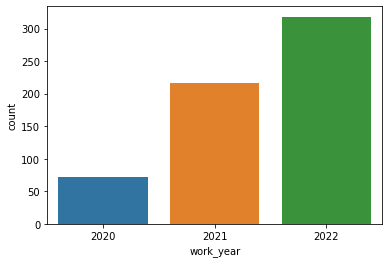

In [17]:
sns.countplot(data=df, x='work_year')

<AxesSubplot:xlabel='work_year', ylabel='count'>

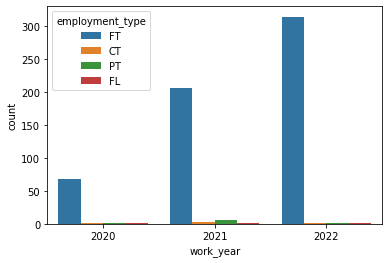

In [18]:
sns.countplot(data=df, x='work_year', hue='employment_type')

<AxesSubplot:xlabel='company_location', ylabel='employment_type'>

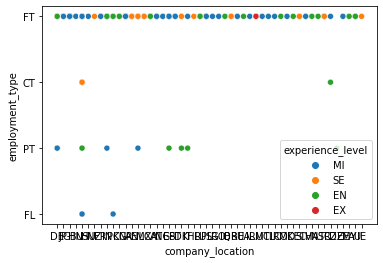

In [19]:
sns.scatterplot(x='company_location', y='employment_type', data=df, hue='experience_level')

Text(0.5, 1.0, 'Title using Matplotlib Function')

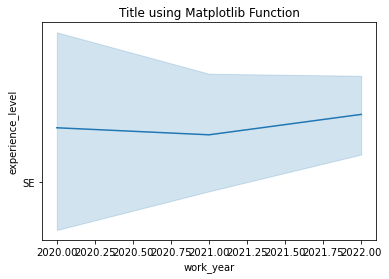

In [20]:
# draw lineplot
sns.lineplot(x="work_year", y="experience_level", data=df)
 
# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

Text(0, 0.5, 'experience_level')

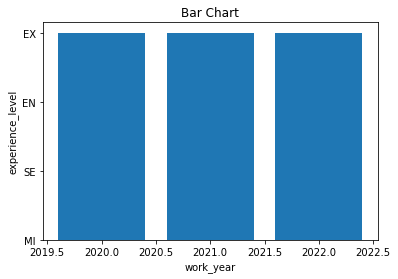

In [22]:
# Barchart
plt.bar(df['work_year'], df['experience_level'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('work_year')
plt.ylabel('experience_level')

Text(0.5, 1.0, 'Histogram')

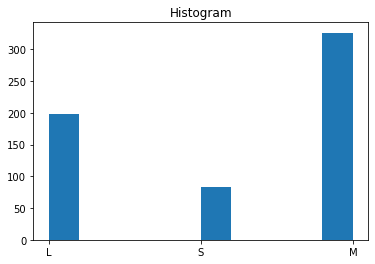

In [23]:
# histogram
plt.hist(df['company_size'])
plt.title("Histogram") 

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'work_year'}>],
       [<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'salary_in_usd'}>]], dtype=object)

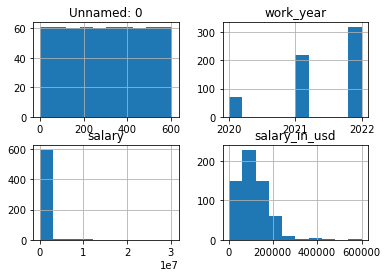

In [24]:
df.hist()